In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


In [2]:

# Simulated historical stock price data (replace with your own data)
data = {
    'Date': pd.date_range(start='2021-01-01', periods=100, freq='D'),
    'Price': np.random.rand(100) * 100 + 100  # Simulated stock prices
}


In [4]:

# Convert data to a DataFrame
df = pd.DataFrame(data)


In [10]:

# Calculate short-term (e.g., 10-day) and long-term (e.g., 50-day) moving averages
df['Short_MA'] = df['Price'].rolling(window=10).mean()
df['Long_MA'] = df['Price'].rolling(window=50).mean()


In [13]:

# Create signals based on moving average crossover
df['Signal'] = 0  # Initialize the signal column
df['Signal'][10:] = np.where(df['Short_MA'][10:] > df['Long_MA'][10:], 1, 0)


/var/folders/gz/r5yqkmw10fngb341szwyt2mr0000gn/T/ipykernel_98048/609095051.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Signal'][10:] = np.where(df['Short_MA'][10:] > df['Long_MA'][10:], 1, 0)


In [14]:

# Calculate daily returns
df['Daily_Return'] = df['Price'].pct_change()

# Apply the trading strategy to generate positions
df['Position'] = df['Signal'].diff()


In [15]:

# Backtest the strategy
initial_balance = 100000  # Starting balance
balance = [initial_balance]  # List to track account balance
shares_held = 0  # Number of shares held
position_value = 0  # Value of the current position

for index, row in df.iterrows():
    if row['Position'] == 1:
        # Buy signal: Invest the entire balance in shares
        shares_held = balance[-1] // row['Price']
        position_value = shares_held * row['Price']
    elif row['Position'] == -1:
        # Sell signal: Liquidate the entire position
        position_value = 0
        shares_held = 0

    # Calculate the updated balance
    balance.append(balance[-1] - position_value)

# Add the balance data to the DataFrame
df['Balance'] = balance[:-1]  # Exclude the last balance value

    

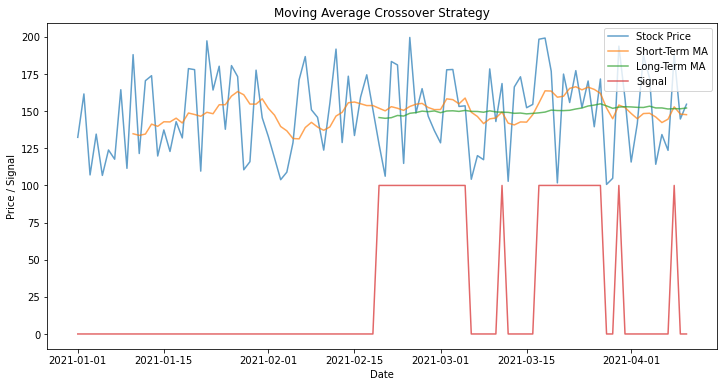

In [16]:


# Plot the stock price, moving averages, and trading signals
plt.figure(figsize=(12, 6))
plt.plot(df['Date'], df['Price'], label='Stock Price', alpha=0.7)
plt.plot(df['Date'], df['Short_MA'], label='Short-Term MA', alpha=0.7)
plt.plot(df['Date'], df['Long_MA'], label='Long-Term MA', alpha=0.7)
plt.plot(df['Date'], df['Signal'] * 100, label='Signal', alpha=0.7)
plt.legend()
plt.xlabel('Date')
plt.ylabel('Price / Signal')
plt.title('Moving Average Crossover Strategy')
plt.show()
